# Assess the sensitivity of SA3 on variables

Perform leave-one-out analysis to assess the effect of individual variables on SA3. Using Prague, Vienna, Bratislava and Munich.

In [148]:
import tempfile

import geopandas as gpd
import pandas as pd
from sklearn import metrics
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import seaborn as sns

from core.generate_clusters import process_single_region_morphotopes
from core.utils import used_keys

from matplotlib import rcParams

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Lato"]


In [52]:
tessellations_dir = '/data/uscuni-ulce/processed_data/tessellations/'
chars_dir = "/data/uscuni-ulce/processed_data/chars/"
buildings_dir = "/data/uscuni-ulce/processed_data/buildings/"
streets_dir = "/data/uscuni-ulce/processed_data/streets/"
enclosures_dir = "/data/uscuni-ulce/processed_data/enclosures/"
graph_dir = "/data/uscuni-ulce/processed_data/neigh_graphs/"
regions_datadir = "/data/uscuni-ulce/"
morphotopes_dir = '/data/uscuni-ulce/processed_data/morphotopes/'

In [53]:
# prague
region_id = 69333

X_train = pd.read_parquet(chars_dir + f'primary_chars_{region_id}.parquet')

In [54]:
col_to_check = X_train.columns.drop(['stcSAl','stbOri','stcOri','stbCeA', 
               'ldkAre', 'ldkPer', 'lskCCo', 'lskERI',
               'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe',
              'licBAD',
              'misBAD',
               'ssbCCM',
               'ssbCCD'
              ])

In [55]:
col_to_check.shape

(59,)

## Prague

In [6]:
actual = pd.read_parquet(morphotopes_dir + f'tessellation_labels_morphotopes_{region_id}_75_0_None_None_False.pq')

In [30]:
def get_scores(ignore):
    with tempfile.TemporaryDirectory() as tempdir:
        process_single_region_morphotopes(
            region_id, 
            graph_dir,
            buildings_dir,
            streets_dir,
            enclosures_dir,
            tessellations_dir,
            chars_dir, 
            tempdir,
            ignore=ignore,
            generate_data=False,
        )
        new = pd.read_parquet(tempdir + f'tessellation_labels_morphotopes_{region_id}_75_0_None_None_False.pq')
        ari = metrics.adjusted_rand_score(actual.morphotope_label, new.morphotope_label)
        ami = metrics.adjusted_mutual_info_score(actual.morphotope_label, new.morphotope_label)
        return ari, ami

In [13]:
%%time

n_jobs = -1
scores = Parallel(n_jobs=n_jobs)(
    delayed(get_scores)(ignore) for ignore in col_to_check
)

CPU times: user 3.76 s, sys: 980 ms, total: 4.74 s
Wall time: 18min 38s
2026-02-02 10:40:04.473732 ----Processing ------ 69333
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBAD', 'misBAD', 'ssbCCM', 'ssbCCD', 'mtbNDi']
2026-02-02 10:47:31.332482 ----Processing ------ 69333
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBAD', 'misBAD', 'ssbCCM', 'ssbCCD', 'sdcLAL']


In [17]:
results = pd.DataFrame(scores, columns=["ari", "ami"], index=col_to_check)

2026-02-02 10:40:04.778187 ----Processing ------ 69333
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBAD', 'misBAD', 'ssbCCM', 'ssbCCD', 'sssLin']
2026-02-02 10:46:02.858543 ----Processing ------ 69333
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBAD', 'misBAD', 'ssbCCM', 'ssbCCD', 'sisBpM']
2026-02-02 10:51:05.908224 ----Processing ------ 69333
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBA

In [25]:
results.to_csv('/data/uscuni-ulce/sensitivity/sa3_variable_drop_prague.csv')

## Vienna

In [27]:
region_id = 86873

In [28]:
actual = pd.read_parquet(morphotopes_dir + f'tessellation_labels_morphotopes_{region_id}_75_0_None_None_False.pq')

In [31]:
%%time

n_jobs = -1
scores = Parallel(n_jobs=n_jobs)(
    delayed(get_scores)(ignore) for ignore in col_to_check
)

2026-02-02 13:02:48.696238 ----Processing ------ 86873
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBAD', 'misBAD', 'ssbCCM', 'ssbCCD', 'ltcBuA']
2026-02-02 13:35:37.205530 ----Processing ------ 86873
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBAD', 'misBAD', 'ssbCCM', 'ssbCCD', 'sdsSWD']


/home/martin/dev/urban_taxonomy/.pixi/envs/default/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


2026-02-02 13:02:47.496684 ----Processing ------ 86873
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBAD', 'misBAD', 'ssbCCM', 'ssbCCD', 'mtbAli']
2026-02-02 13:36:04.652386 ----Processing ------ 86873
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBAD', 'misBAD', 'ssbCCM', 'ssbCCD', 'linPDE']
2026-02-02 13:02:47.351522 ----Processing ------ 86873
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBA

In [32]:
results = pd.DataFrame(scores, columns=["ari", "ami"], index=col_to_check)

In [33]:
results.to_csv('/data/uscuni-ulce/sensitivity/sa3_variable_drop_vienna.csv')

2026-02-02 13:02:47.973314 ----Processing ------ 86873
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBAD', 'misBAD', 'ssbCCM', 'ssbCCD', 'sdbCoA']
2026-02-02 13:35:50.535092 ----Processing ------ 86873
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBAD', 'misBAD', 'ssbCCM', 'ssbCCD', 'lcdMes']
2026-02-02 14:07:39.571791 ----Processing ------ 86873
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBA

## Bratislava

In [39]:
region_id = 99886

In [40]:
actual = pd.read_parquet(morphotopes_dir + f'tessellation_labels_morphotopes_{region_id}_75_0_None_None_False.pq')

In [41]:
def get_scores(ignore):
    with tempfile.TemporaryDirectory() as tempdir:
        process_single_region_morphotopes(
            region_id, 
            graph_dir,
            buildings_dir,
            streets_dir,
            enclosures_dir,
            tessellations_dir,
            chars_dir, 
            tempdir,
            ignore=ignore,
            generate_data=False,
        )
        new = pd.read_parquet(tempdir + f'tessellation_labels_morphotopes_{region_id}_75_0_None_None_False.pq')
        ari = metrics.adjusted_rand_score(actual.morphotope_label, new.morphotope_label)
        ami = metrics.adjusted_mutual_info_score(actual.morphotope_label, new.morphotope_label)
        return ari, ami

In [42]:
%%time

n_jobs = -1
scores = Parallel(n_jobs=n_jobs)(
    delayed(get_scores)(ignore) for ignore in col_to_check
)

CPU times: user 1.29 s, sys: 204 ms, total: 1.49 s
Wall time: 5min 23s


In [43]:
results = pd.DataFrame(scores, columns=["ari", "ami"], index=col_to_check)

In [44]:
results.to_csv('/data/uscuni-ulce/sensitivity/sa3_variable_drop_bratislava.csv')

## Munich

In [47]:
region_id = 38679

2026-02-02 14:44:39.888445 ----Processing ------ 99886
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBAD', 'misBAD', 'ssbCCM', 'ssbCCD', 'sdbAre']
2026-02-02 14:46:41.561177 ----Processing ------ 99886
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBAD', 'misBAD', 'ssbCCM', 'ssbCCD', 'midRea']


In [48]:
actual = pd.read_parquet(morphotopes_dir + f'tessellation_labels_morphotopes_{region_id}_75_0_None_None_False.pq')

In [49]:
def get_scores(ignore):
    with tempfile.TemporaryDirectory() as tempdir:
        process_single_region_morphotopes(
            region_id, 
            graph_dir,
            buildings_dir,
            streets_dir,
            enclosures_dir,
            tessellations_dir,
            chars_dir, 
            tempdir,
            ignore=ignore,
            generate_data=False,
        )
        new = pd.read_parquet(tempdir + f'tessellation_labels_morphotopes_{region_id}_75_0_None_None_False.pq')
        ari = metrics.adjusted_rand_score(actual.morphotope_label, new.morphotope_label)
        ami = metrics.adjusted_mutual_info_score(actual.morphotope_label, new.morphotope_label)
        return ari, ami

In [50]:
%%time

n_jobs = -1
scores = Parallel(n_jobs=n_jobs)(
    delayed(get_scores)(ignore) for ignore in col_to_check
)

2026-02-02 14:44:40.664269 ----Processing ------ 99886
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBAD', 'misBAD', 'ssbCCM', 'ssbCCD', 'ssbElo']
2026-02-02 14:46:31.608825 ----Processing ------ 99886
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBAD', 'misBAD', 'ssbCCM', 'ssbCCD', 'linP3W']
2026-02-02 14:48:00.344720 ----Processing ------ 99886
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBA

/home/martin/dev/urban_taxonomy/.pixi/envs/default/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


2026-02-02 14:44:41.429786 ----Processing ------ 99886
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBAD', 'misBAD', 'ssbCCM', 'ssbCCD', 'sdbCoA']
2026-02-02 14:46:26.380597 ----Processing ------ 99886
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBAD', 'misBAD', 'ssbCCM', 'ssbCCD', 'mtdDeg']
2026-02-02 14:47:51.540175 ----Processing ------ 99886
--------Generating lag----------
--------Generating morphotopes---------- 75
--------Dropping columns---------- ['stcSAl', 'stbOri', 'stcOri', 'stbCeA', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe', 'licBA

In [57]:
results = pd.DataFrame(scores, columns=["ari", "ami"], index=col_to_check)

In [58]:
results.to_csv('/data/uscuni-ulce/sensitivity/sa3_variable_drop_munich.csv')

In [62]:
prg = pd.read_csv('/data/uscuni-ulce/sensitivity/sa3_variable_drop_prague.csv', index_col=0)
vienna = pd.read_csv('/data/uscuni-ulce/sensitivity/sa3_variable_drop_vienna.csv', index_col=0)
blava = pd.read_csv('/data/uscuni-ulce/sensitivity/sa3_variable_drop_bratislava.csv', index_col=0)
munich = pd.read_csv('/data/uscuni-ulce/sensitivity/sa3_variable_drop_munich.csv', index_col=0)

In [64]:
ami = pd.DataFrame({
    "Prague": prg.ami,
    "Vienna": vienna.ami,
    "Bratislava": blava.ami,
    "Munich": munich.ami,
})

In [67]:
ami["mean"] = ami.mean(axis=1)

In [75]:
colors = [
    "#4069BC",
    "#7CBAE4",
    "#E69C63",
    "#eec1d5",
    "#E0665F",
    "#ECBF43",
    "#b2cd32",
    "#1F943E",
]

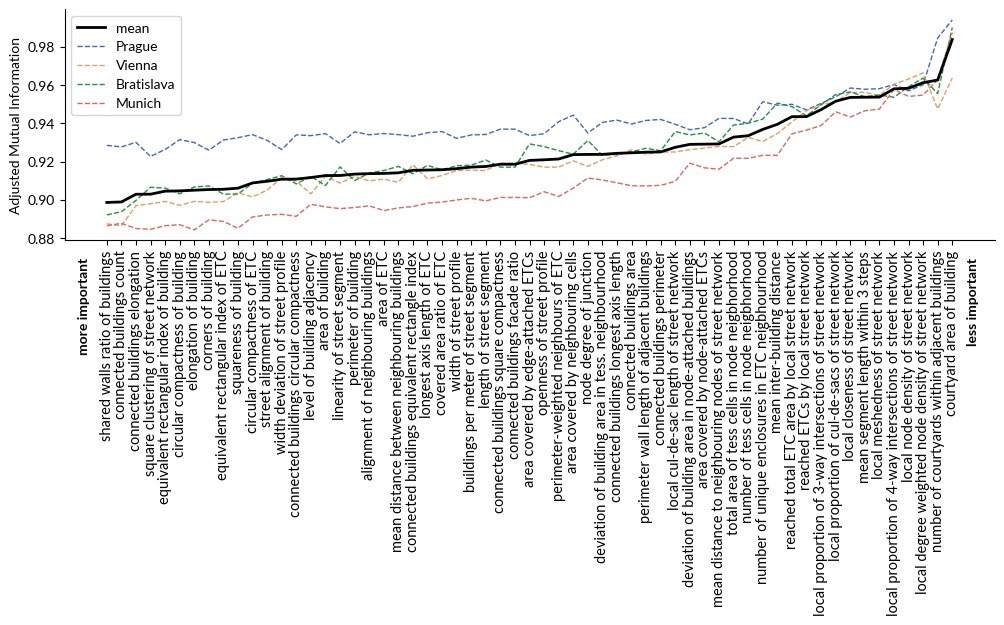

In [163]:
ax = ami.sort_values('mean')["mean"].plot(figsize=(12, 3), zorder=5, color="k", linewidth=2)
ami.sort_values('mean').Prague.plot(ax=ax, linewidth=1, color=colors[0], linestyle="dashed")
ami.sort_values('mean').Vienna.plot(ax=ax, linewidth=1, color=colors[2], linestyle="dashed")
ami.sort_values('mean').Bratislava.plot(ax=ax, linewidth=1, color=colors[7], linestyle="dashed")
ami.sort_values('mean').Munich.plot(ax=ax, linewidth=1, color=colors[4], linestyle="dashed")
ax.legend()
plt.xticks(ticks=range(len(ami)), labels=ami.sort_values('mean').index.map(used_keys), rotation=90, fontsize=10.5)
sns.despine()

ax.text(-2, .82, "more important", rotation=90, fontweight='bold')
ax.text(59, .825, "less important", rotation=90, fontweight='bold')

ax.set_ylabel("Adjusted Mutual Information")
plt.savefig("../data/ami.png", bbox_inches="tight", dpi=300)

In [190]:
freq = pd.read_csv("../data/split_frequencies.csv", index_col=0).set_index("Feature")

In [191]:
new_keys = used_keys.copy()
new_keys["limLPS"] = "building structure optimised for sunlight"
new_keys["limAre"] = "sum of the largest 75 building areas in the morphotope"
new_keys["limPer"] = "sum of the largest 75 building perimeters in the morphotope"
new_keys["limLAL"] = "sum of the largest 75 axis lengths"

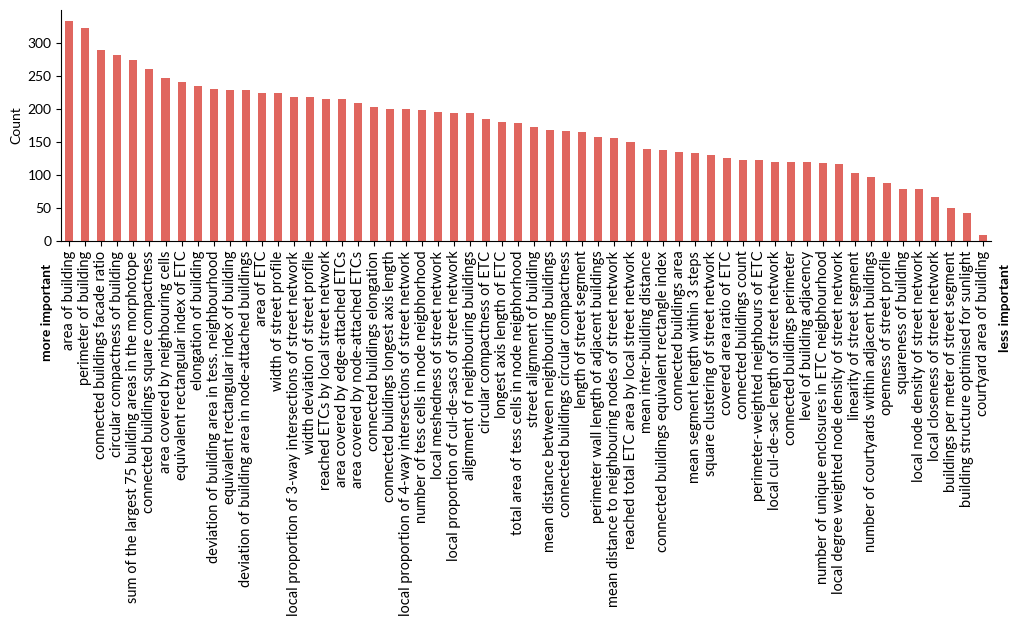

In [193]:
ax = freq["Count"].plot.bar(figsize=(12, 3), color=colors[4])
plt.xticks(ticks=range(len(freq)), labels=freq.index.map(new_keys), rotation=90, fontsize=10.5)
sns.despine()
ax.set_ylabel("Count")
ax.set_xlabel(" ")
ax.text(-1.75, -178, "more important", rotation=90, fontweight='bold')
ax.text(58, -165, "less important", rotation=90, fontweight='bold')
plt.savefig("../data/splits.png", bbox_inches="tight", dpi=300)

In [194]:
freq

,Count
Feature,
sdbAre,333
sdbPer,322
mibFR,289
ssbCCo,282
limAre,273
mibSCo,260
mdcAre,247
sscERI,240
ssbElo,234
